In [1]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt

In [2]:
digits = load_digits()

In [3]:
digits.data[0].reshape(8, 8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

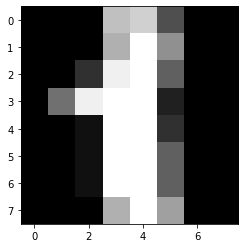

In [4]:
plt.imshow(np.reshape(digits.data[1], (8,8)), cmap=plt.cm.gray);

In [5]:
X, y = digits.data, digits.target

In [123]:
input = X[0]
true = y[0]


weights = np.ones((1, 64))
error = 1
delta = 0
alpha = 0.0001
iteration = 0

In [118]:
y[0]

0

In [124]:
def neural_network(input, weights):
    prediction = input.dot(weights.T)
    return prediction

def outer_prod(vec1, vec2):
    out = np.zeros((len(vec1), len(vec2)))
    
    # write an algorith of outer product
    for i in range(len(vec1)):

        for j in range(len(vec2)):
            out[i][j] = vec1[i]*vec2[j]
            
    return out

In [125]:
pred = neural_network(input, weights)
print('Prediction:' + str(pred))

error = (pred - true) ** 2
delta =  pred - true

Prediction:[294.]


In [126]:
error= (pred- true)**2
error

array([86436.])

In [127]:
delta= pred -true
delta

array([294.])

In [128]:
outer_prod(delta, input)

array([[   0.,    0., 1470., 3822., 2646.,  294.,    0.,    0.,    0.,
           0., 3822., 4410., 2940., 4410., 1470.,    0.,    0.,  882.,
        4410.,  588.,    0., 3234., 2352.,    0.,    0., 1176., 3528.,
           0.,    0., 2352., 2352.,    0.,    0., 1470., 2352.,    0.,
           0., 2646., 2352.,    0.,    0., 1176., 3234.,    0.,  294.,
        3528., 2058.,    0.,    0.,  588., 4116., 1470., 2940., 3528.,
           0.,    0.,    0.,    0., 1764., 3822., 2940.,    0.,    0.,
           0.]])

In [129]:
weights_delta= outer_prod(delta, input)

In [130]:
weights_delta

array([[   0.,    0., 1470., 3822., 2646.,  294.,    0.,    0.,    0.,
           0., 3822., 4410., 2940., 4410., 1470.,    0.,    0.,  882.,
        4410.,  588.,    0., 3234., 2352.,    0.,    0., 1176., 3528.,
           0.,    0., 2352., 2352.,    0.,    0., 1470., 2352.,    0.,
           0., 2646., 2352.,    0.,    0., 1176., 3234.,    0.,  294.,
        3528., 2058.,    0.,    0.,  588., 4116., 1470., 2940., 3528.,
           0.,    0.,    0.,    0., 1764., 3822., 2940.,    0.,    0.,
           0.]])

In [131]:
for i in range(len(weights)):
        weights[i] = weights[i] -alpha * weights_delta[i]

In [132]:
weights

array([[1.    , 1.    , 0.853 , 0.6178, 0.7354, 0.9706, 1.    , 1.    ,
        1.    , 1.    , 0.6178, 0.559 , 0.706 , 0.559 , 0.853 , 1.    ,
        1.    , 0.9118, 0.559 , 0.9412, 1.    , 0.6766, 0.7648, 1.    ,
        1.    , 0.8824, 0.6472, 1.    , 1.    , 0.7648, 0.7648, 1.    ,
        1.    , 0.853 , 0.7648, 1.    , 1.    , 0.7354, 0.7648, 1.    ,
        1.    , 0.8824, 0.6766, 1.    , 0.9706, 0.6472, 0.7942, 1.    ,
        1.    , 0.9412, 0.5884, 0.853 , 0.706 , 0.6472, 1.    , 1.    ,
        1.    , 1.    , 0.8236, 0.6178, 0.706 , 1.    , 1.    , 1.    ]])

Iteration 1
Prediction:[294.]
Error:     [86436.]
***************
Iteration 2
Prediction:[203.742]
Error:     [41510.802564]
***************
Iteration 3
Prediction:[141.193206]
Error:     [19935.52142056]
***************
Iteration 4
Prediction:[97.84689176]
Error:     [9574.0142267]
***************
Iteration 5
Prediction:[67.80789599]
Error:     [4597.91075836]
***************
Iteration 6
Prediction:[46.99087192]
Error:     [2208.14204379]
***************
Iteration 7
Prediction:[32.56467424]
Error:     [1060.45800839]
***************
Iteration 8
Prediction:[22.56731925]
Error:     [509.28389807]
***************
Iteration 9
Prediction:[15.63915224]
Error:     [244.58308276]
***************
Iteration 10
Prediction:[10.8379325]
Error:     [117.46078091]
***************
Iteration 11
Prediction:[7.51068722]
Error:     [56.41042257]
***************
Iteration 12
Prediction:[5.20490625]
Error:     [27.09104903]
***************
Iteration 13
Prediction:[3.60700003]
Error:     [13.01044921]
*****

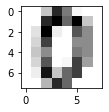

In [87]:
while error > 0.01:
    iteration += 1
    print(f'Iteration {iteration}')
    
    pred = neural_network(input, weights)
    print('Prediction:' + str(pred))

    error = (pred - true) ** 2
    delta =  pred - true
    print('Error:     ' + str(error) + '\n***************')
    
    weights_delta= outer_prod(delta, input)
    
    for i in range(len(weights)):
        weights[i] -= alpha * weights_delta[i]
    
else:
    print(f'Number is {int(pred)}. \nFound in {iteration} iterations')
    
    # showing the image of digit
    f, axes = plt.subplots(1, 1, sharey=True, figsize=(4,1.5))
    axes.imshow(input.reshape([8,8]), cmap='Greys');